## Implementation of Bisection and Goldensection

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def derivative(f, x, h=1e-6):
    return (f(x + h) - f(x - h)) / (2 * h)

def bisection_minimizer(func, a, b, tol=1e-5):
    """
    Finds the minimum point of a scalar function `func` within the interval [a, b]
    using the bisection method.
    
    Parameters:
    func : callable
        The scalar function to minimize.
    a, b : float
        The interval [a, b] in which to search for the minimum.
    tol : float, optional
        The tolerance for convergence. The function will stop when the interval size is less than `tol`.
        
    Returns:
    float
        The estimated location of the minimum point.
    """
    iternum = 0
    trace = []
    mid = (b-a)/2
    while (b - a)  > tol:
        iternum+=1
        mid = (b+a)/2
        if derivative(func, mid)>0:
            b=mid
        elif derivative(func,mid)<0:
            a=mid
        trace.append(mid)
    x_min = (a+b)/2
    print(f"interation number: {iternum}, x_min={x_min}")
    return x_min, trace, iternum

def golden_section_minimizer(func, a, b, tol=1e-5):
    """
    Finds the minimum point of a scalar function `func` within the interval [a, b]
    using the Golden Section Search method.
    
    Parameters:
    func : callable
        The scalar function to minimize.
    a, b : float
        The interval [a, b] in which to search for the minimum.
    tol : float, optional
        The tolerance for convergence. The function will stop when the interval size is less than `tol`.
        
    Returns:
    float
        The estimated location of the minimum point.
    """
    # Golden ratio constant
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi  # Equivalent to (3 - sqrt(5)) / 2

    # Define the two interior points
    c = a + resphi * (b - a)
    d = b - resphi * (b - a)
    fc, fd = func(c), func(d)
    iternum = 0
    trace = []

    while abs(b - a) > tol:
        iternum+=1
        if fc < fd:
            b, d, fd = d, c, fc
            c = a + resphi * (b - a)
            fc = func(c)
        else:
            a, c, fc = c, d, fd
            d = b - resphi * (b - a)
            fd = func(d)
        trace.append((a+b)/2)
    x_min = (a + b) / 2
    # The midpoint of the final interval is our best estimate for the minimum
    print(f"interation number: {iternum}, x_min={x_min}")
    return x_min, trace, iternum

def g(x):
    return x*np.sin(x)*np.arctan(x)


# setting of searching
left = -3.5 # convergen when left = -3, right unchanged.
right = 7.5
tol = 1e-5
def plotting(left,right,tol):
    # start searching and store results
    x_b, trace_b, iternum_bisection = bisection_minimizer(g,a=left,b=right,tol=tol)
    x_g, trace_g, iternum_golden = golden_section_minimizer(g,a=left,b=right,tol=tol)

    # setting of plot
    x = np.arange(start=min(-3.5,left),stop=max(7.5,right),step=0.01)
    y = g(x)
    save_path = f'left_{left}_right_{right}.png'

    fig,ax=plt.subplots(1,1,figsize = (8,8))
    ax.plot(x,y,color='black',label = r'$g(x) = x\cdot sin(x)\cdot arctan(x)$')
    ax.plot(trace_b, g(trace_b),color='red',linestyle = (0,(1,10)),marker = '.',label = r'trace of bisection')
    ax.plot(trace_g,g(trace_g),color='blue',marker = '.',label = r'trace of golden')
    ax.scatter(x_b,g(x_b),marker='s',color = 'red',label = f'bisection $x^* = {x_b:.3f}$, iteration:{iternum_bisection}')
    ax.scatter(x_g,g(x_g),marker='x',color = 'blue',label = f'golden $x^* = {x_g:.3f}$, iteration:{iternum_golden}')
    ax.set_xlabel('x')
    ax.set_ylabel(r'$g(x) = x\cdot sin(x)\cdot arctan(x)$')
    ax.set_title(f'search in $[{left},{right}]$, tolerance=${tol:.6f}$')
    ax.legend()
    ax.grid(alpha = 0.5)
    fig.savefig(save_path)
    plt.show()

## We first try searching in $[-3.5,7.5]$ by default

interation number: 21, x_min=-2.131821393966675
interation number: 29, x_min=4.939559856460312


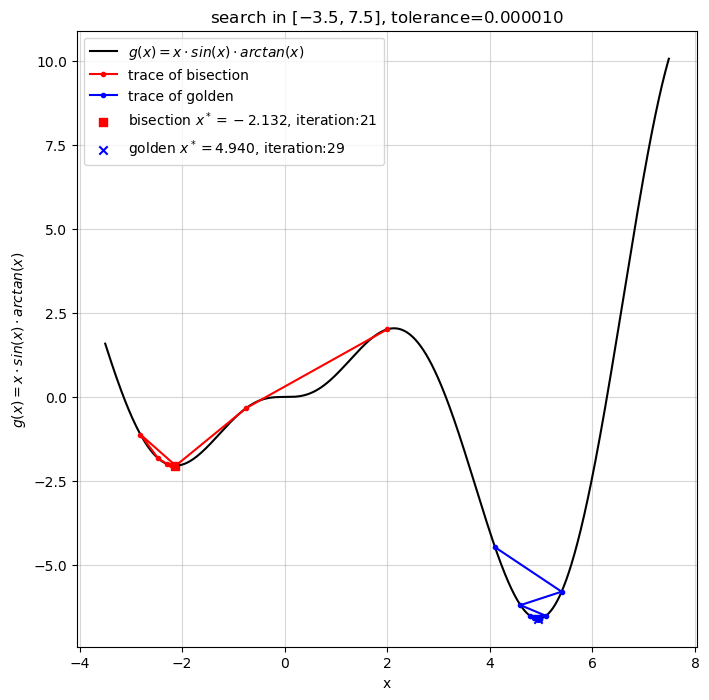

In [11]:
plotting(left=-3.5,right=7.5,tol=1e-5)

## Then search in $[-3,7.5]$, both bisection and golden section converge in the same point.

interation number: 21, x_min=4.939560055732727
interation number: 29, x_min=4.939562912449324


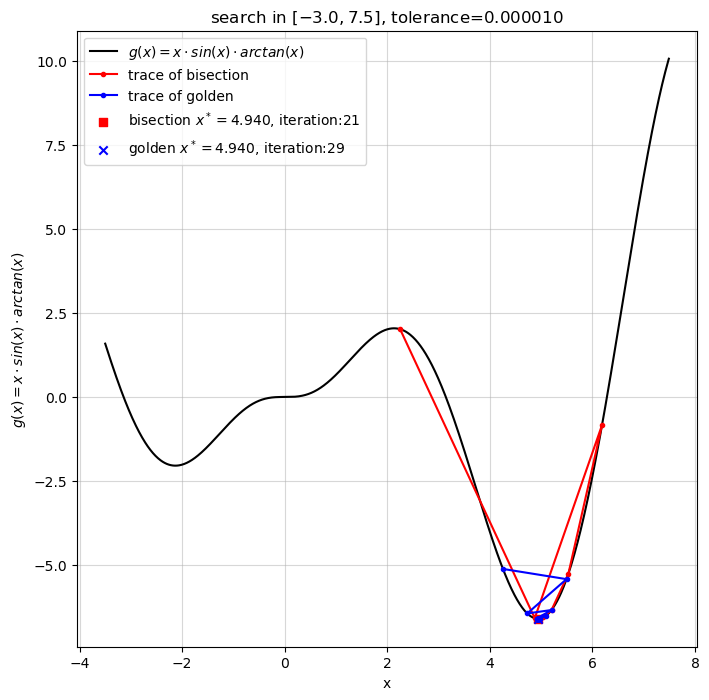

In [12]:
plotting(left=-3.0, right=right, tol=tol)